#first notebook for pandas and data visualization

#Pandas package modules

In [67]:
import pandas as pd
def filter_data(df,threshold):
    df['mean'] = df[['Sample1','Sample2','Sample3']].mean(axis =1)
    return df[df['mean']<threshold][['Gene','mean']]
df = pd.read_csv('data.csv')
results = filter_data(df,5)
results

,Gene,mean
3,Gene4,4.500000
7,Gene8,4.766667
11,Gene12,4.900000
15,Gene16,4.700000
19,Gene20,4.600000
23,Gene24,4.800000
27,Gene28,4.900000
33,Gene34,4.750000
37,Gene38,4.800000
41,Gene42,4.900000


In [59]:
s1_mean = df["Sample1"].median()
s1_mean

np.float64(6.0)

In [60]:
df.isnull().sum()

Gene       0
Sample1    0
Sample2    2
Sample3    1
Length     1
dtype: int64

In [61]:
df = df.fillna('mean')

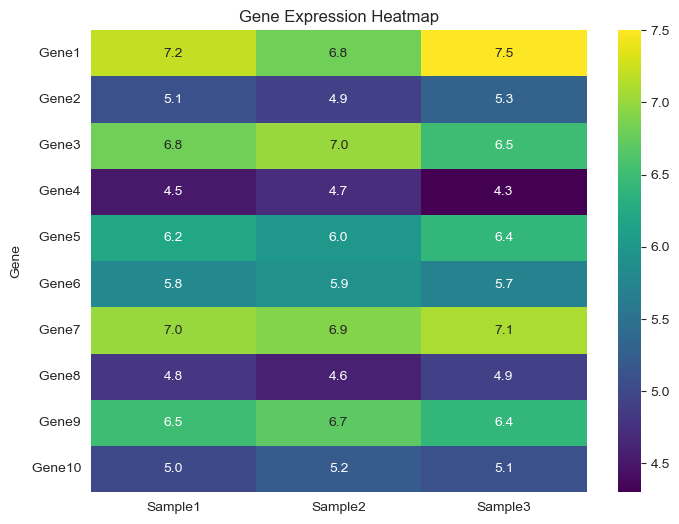

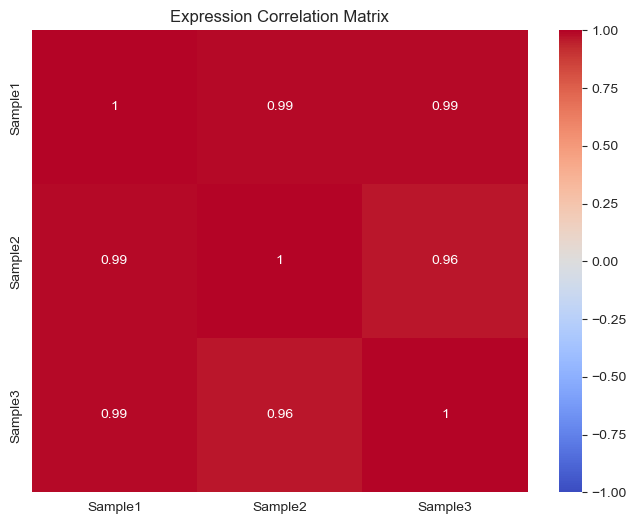

In [70]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_heatmap(df, output_file):

    # Plot a heatmap of gene expression for the first 10 genes.
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(8, 6))
    subset = df.head(10).set_index("Gene")[['Sample1', 'Sample2', 'Sample3']]
    sns.heatmap(subset, cmap="viridis", annot=True, fmt=".1f")
    plt.title("Gene Expression Heatmap")
    plt.show()
    plt.savefig(output_file, dpi=300)
    plt.close()

def plot_correlation(df, output_file):

    # Plot correlation matrix of expression levels.

    sns.set_style("whitegrid")
    plt.figure(figsize=(8, 6))
    corr = df[['Sample1', 'Sample2', 'Sample3']].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Expression Correlation Matrix")
    plt.show()
    plt.savefig(output_file, dpi=300)
    plt.close()

# Usage
df = pd.read_csv("data.csv")
plot_heatmap(df, "heatmap.png")
plot_correlation(df, "correlation.png")

In [71]:
import plotly.express as px
import pandas as pd

def plot_scatter(df, output_file):
    # Plot interactive scatter of expression vs. length
    df['Mean'] = df[['Sample1', 'Sample2', 'Sample3']].mean(axis=1)
    fig = px.scatter(df, x="Mean", y="Length", text="Gene", title="Expression vs. Sequence Length")
    fig.update_layout(font=dict(size=12), title_font_size=14)
    fig.show()
    # fig.write_html(output_file)

def plot_trends(df, output_file):
    # Plot interactive line plot of expression trends for first 5 genes.
    subset = df.head(5)
    fig = px.line(subset, x=['Sample1', 'Sample2', 'Sample3'], y=subset['Gene'].values, title="Gene Expression Trends")
    fig.update_layout(xaxis_title="Sample", yaxis_title="Expression", font=dict(size=12), title_font_size=14)
    fig.show()
    # fig.write_html(output_file)

# Usage
df = pd.read_csv("data.csv")
plot_scatter(df, "scatter.html")
plot_trends(df, "trends.html")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed